<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek41.do.txt  -->
<!-- dom:TITLE: Exercises week 41 -->


# Exercises week 42

**October 14-18, 2024**

Date: **Deadline is Friday October 18 at midnight**


# Overarching aims of the exercises this week

The aim of the exercises this week is to get started with implementing a neural network. There are a lot of technical and finicky parts of implementing a neutal network, so take your time.

This week, you will implement only the feed-forward pass. Next week, you will implement backpropagation. We recommend that you do the exercises this week by editing and running this notebook file, as it includes several checks along the way that you have implemented the pieces of the feed-forward pass correctly. If you have trouble running a notebook, or importing pytorch, you can run this notebook in google colab instead: (LINK TO COLAB), though we recommend that you set up VSCode and your python environment to run code like this locally.


In [1]:
import autograd.numpy as np
from autograd import grad

# Exercise 1

Complete the following parts to compute the activation of the first layer.


In [2]:
np.random.seed(2024)


def ReLU(z):
    return np.where(z > 0, z, 0)


x = np.random.randn(2)  # network input
W1 = np.random.randn(4, 2)  # first layer weights

**a)** Define the bias of the first layer, `b1`with the correct shape


In [3]:
b1 = np.random.randn(4)

**b)** Compute the intermediary `z1` for the first layer


In [4]:
z1 = W1 @ x + b1

**c)** Compute the activation `a1` for the first layer using the ReLU activation function defined earlier.


In [5]:
a1 = ReLU(z1)

Confirm that you got the correct activation with the test below.


In [6]:
sol1 = np.array([0.60610368, 4.0076268, 0.0, 0.56469864])

print(np.allclose(a1, sol1))

True


# Exercise 2

Compute the activation of the second layer with an output of length 8 and ReLU activation.

**a)** Define the weight and bias of the second layer with the right shapes.


In [7]:
W2 = np.random.randn(8, 4)
b2 = np.random.randn(8)

**b)** Compute intermediary `z2` and activation `a2` for the second layer.


In [8]:
z2 = W2 @ a1
a2 = ReLU(z2)

Confirm that you got the correct activation shape with the test below.


In [9]:
print(a2.shape == (8,))

True


# Exercise 3

We often want our neural networks to have many layers of varying sizes. To avoid writing very long and error-prone code where we explicitly define and evaluate each layer we should keep all our layers in a single variable which is easy to create and use.

**a)** Complete the function below so that it returns a list `layers` of weight and bias tuples `(W, b)` for each layer, in order, with the correct shapes that we can use later as our network parameters.


In [10]:
def create_layers(network_input_size, output_sizes):
    layers = []

    i_size = network_input_size
    for output_size in output_sizes:
        W = np.random.rand(output_size, i_size)
        b = np.random.rand(output_size)
        layers.append((W, b))

        i_size = output_size
    return layers

**b)** Comple the function below so that it evaluates the intermediate `z` and activation `a` for each layer, and returns the final activation `a`. This is the complete feed-forward pass, a full neural network!


In [11]:
def feed_forward(layers, input):
    a = input
    for W, b in layers:
        z = W @ a + b
        a = ReLU(z)
    return a

**c)** Create a network with input size 8 and layers with output sizes 10, 16, 6, 2. Evaluate it and make sure that you get the correct size vectors along the way.


# Exercise 4


So far, every layer has used the same activation, ReLU. We often want to use other types of activation however, so we need to update our code to support multiple types of activation. Make sure that you have completed every previous exercise before trying this one.

**a)** Make the `create_layers` function also accept a list of activation functions, which is used to add activation functions to each of the tuples in `layers`. Make new functions to not mess with the old ones.


In [12]:
def create_layers_4(network_input_size, output_sizes, activation_funcs):
    layers = []

    i_size = network_input_size
    for output_size, activation in zip(output_sizes, activation_funcs):
        W = np.random.rand(output_size, i_size)
        b = np.random.rand(output_size)
        layers.append((W, b, activation))

        i_size = output_size
    return layers

**b)** Update the `feed_forward` function to support this change.


In [13]:
def feed_forward_4(layers, input):
    a = input
    for W, b, activation in layers:
        z = W @ a + b
        a = activation(z)
    return a

**c)** Create and evaluate a neural network with 4 inputs and layers with output sizes 12, 10, 3 and activations ReLU, ReLU, softmax.


In [14]:
from scipy.special import softmax

network_input_size = 4
output_sizes = [12, 10, 3]
activation_funcs = [ReLU, ReLU, softmax]
layers = create_layers_4(network_input_size, output_sizes, activation_funcs)

x = np.random.randn(network_input_size)
predict = feed_forward_4(layers, x)

The final exercise will hopefully be very simple if everything has worked so far. You will evaluate your neural network on the iris data set (https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html).

This dataset contains data on 150 flowers of 3 different types which can be separated pretty well using the four features given for each flower, which includes the width and length of their leaves. You are not expected to do any training of the network or actual classification, unless you feel like it, in that case you can do exercise 5.


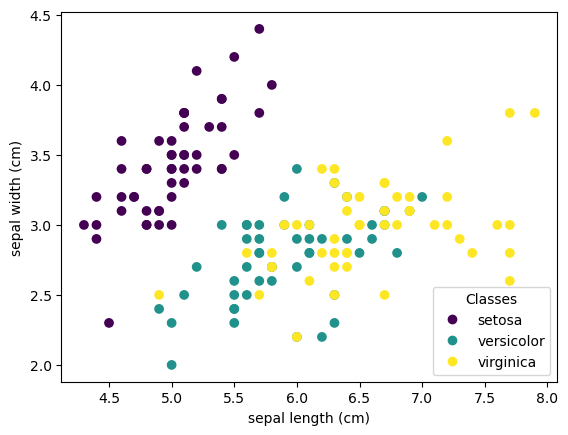

In [15]:
# Loading and plotting iris dataset
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

**c)** Loop over the iris dataset(`iris.data`) and evaluate the network for each data point.


In [16]:
# No need to change this cell! Just make sure it works!
for x in iris.data:
    prediction = feed_forward_4(layers, x)

# Exercise 5 (Very optional and very hard :)


**a)** Make the iris target values into one-hot vectors.

**b)** Define the cross-entropy loss function to evaluate the performance of your network on the data set.

**c)** Use the autograd package to take the gradient of the cross entropy wrt. the weights and biases of the network.

**d)** Use gradient descent of some sort to optimize the parameters.

**e)** Evaluate the accuracy of the network.

**e)** Show off how you did in a group session!
